<a href="https://colab.research.google.com/github/Elisha-Kiplangat/Machine-Learning-Model/blob/main/Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Problem Statement**  

 The model aims to predict whether a given insurance policy has a high or low written premium amount based on various features related to insurance metrics, company performance, and policy characteristics.

### **Context**  
Insurance companies track numerous factors to understand the performance of their agencies and the quality of the policies they manage. A critical metric for these companies is the Written Premium Amount, which represents the total amount of premiums written for a set of policies. Accurately predicting whether a policy will have a high or low written premium helps insurance companies optimize their marketing, sales strategies, and resource allocation.

### **Description**  

#### **Data**  
The dataset contains multiple features associated with insurance policies and company performance, including:

- **Retention Ratio** - A measure of how well an agency retains its customers year-over-year.
- **Loss Ratio** - The ratio of incurred losses to earned premiums, indicating the financial health and risk associated with the policies.
- **3-Year Growth Rate** - The change in written premiums over a three-year period, showing an agency's growth trend.
- **Written Premium Amount** - The total value of the premiums written for a given policy.
- **State and Product Information** - Categorical data representing the location and type of product sold.

#### **Goal**  
The Goal for the classification model is to determine whether a policy has a **high written premium** (`1`) or **low written premium** (`0`).


In [1]:
import pandas as pd

# Load the CSV file
file_path = '/content/finalapi.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset and general info
data_head = data.head()
data_info = data.info()
data_description = data.describe()

data_head, data_info, data_description


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9393 entries, 0 to 9392
Data columns (total 49 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   AGENCY_ID                  9393 non-null   int64  
 1   PRIMARY_AGENCY_ID          9393 non-null   int64  
 2   PROD_ABBR                  9393 non-null   object 
 3   PROD_LINE                  9393 non-null   object 
 4   STATE_ABBR                 9393 non-null   object 
 5   STAT_PROFILE_DATE_YEAR     9393 non-null   int64  
 6   RETENTION_POLY_QTY         9393 non-null   int64  
 7   POLY_INFORCE_QTY           9393 non-null   int64  
 8   PREV_POLY_INFORCE_QTY      9393 non-null   int64  
 9   NB_WRTN_PREM_AMT           9393 non-null   float64
 10  WRTN_PREM_AMT              9393 non-null   float64
 11  PREV_WRTN_PREM_AMT         9393 non-null   float64
 12  PRD_ERND_PREM_AMT          9393 non-null   float64
 13  PRD_INCRD_LOSSES_AMT       9393 non-null   float

(   AGENCY_ID  PRIMARY_AGENCY_ID   PROD_ABBR PROD_LINE STATE_ABBR  \
 0          3                  3  BOILERMACH        CL         IN   
 1          3                  3  BOILERMACH        CL         IN   
 2          3                  3  BOILERMACH        CL         IN   
 3          3                  3  BOILERMACH        CL         IN   
 4          3                  3  BOILERMACH        CL         IN   
 
    STAT_PROFILE_DATE_YEAR  RETENTION_POLY_QTY  POLY_INFORCE_QTY  \
 0                    2005                   0                 0   
 1                    2006                   0                 0   
 2                    2007                   0                 0   
 3                    2008                   0                 0   
 4                    2009                   0                 0   
 
    PREV_POLY_INFORCE_QTY  NB_WRTN_PREM_AMT  ...  PL_BOUND_CT_ELINKS  \
 0                      0              40.0  ...                   0   
 1                      0     

In [2]:
# Check for null values
print(data.isnull().sum())

# Remove rows with null values (if any)
data = data.dropna()


AGENCY_ID                    0
PRIMARY_AGENCY_ID            0
PROD_ABBR                    0
PROD_LINE                    0
STATE_ABBR                   0
STAT_PROFILE_DATE_YEAR       0
RETENTION_POLY_QTY           0
POLY_INFORCE_QTY             0
PREV_POLY_INFORCE_QTY        0
NB_WRTN_PREM_AMT             0
WRTN_PREM_AMT                0
PREV_WRTN_PREM_AMT           0
PRD_ERND_PREM_AMT            0
PRD_INCRD_LOSSES_AMT         0
MONTHS                       0
RETENTION_RATIO              0
LOSS_RATIO                   0
LOSS_RATIO_3YR               0
GROWTH_RATE_3YR              0
AGENCY_APPOINTMENT_YEAR      0
ACTIVE_PRODUCERS             0
MAX_AGE                      0
MIN_AGE                      0
VENDOR_IND                   0
VENDOR                       0
PL_START_YEAR                0
PL_END_YEAR                  0
COMMISIONS_START_YEAR        0
COMMISIONS_END_YEAR          0
CL_START_YEAR                0
CL_END_YEAR                  0
ACTIVITY_NOTES_START_YEAR    0
ACTIVITY

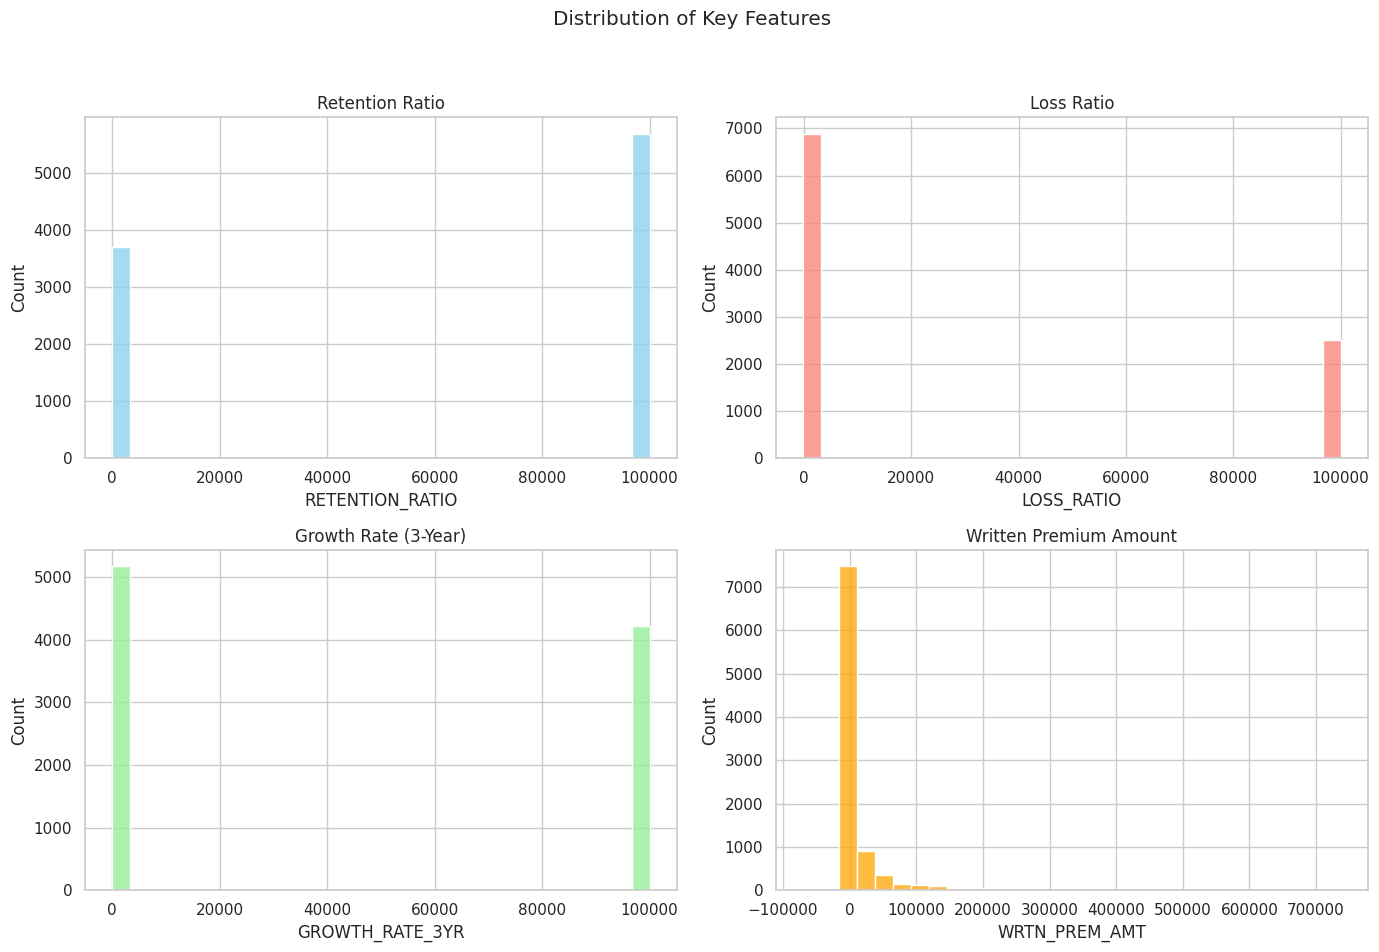

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up visualization styles
sns.set(style="whitegrid")

# Visualize distribution of some key numerical features
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Distribution of Key Features')

# Distribution plots
sns.histplot(data['RETENTION_RATIO'], bins=30, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Retention Ratio')

sns.histplot(data['LOSS_RATIO'], bins=30, ax=axes[0, 1], color='salmon')
axes[0, 1].set_title('Loss Ratio')

sns.histplot(data['GROWTH_RATE_3YR'], bins=30, ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title('Growth Rate (3-Year)')

sns.histplot(data['WRTN_PREM_AMT'], bins=30, ax=axes[1, 1], color='orange')
axes[1, 1].set_title('Written Premium Amount')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Check for non-numeric columns
non_numeric_columns = X.select_dtypes(include=['object']).columns
print(f"Non-numeric columns to remove or encode: {non_numeric_columns}")

# Remove non-numeric columns
X = X.select_dtypes(exclude=['object'])

# For example, categorize 'WRTN_PREM_AMT' as high (1) or low (0) based on the median
median_premium = data['WRTN_PREM_AMT'].median()
data['PREMIUM_HIGH'] = (data['WRTN_PREM_AMT'] > median_premium).astype(int)

# Check the distribution of the new target
print("New Target class distribution:")
print(data['PREMIUM_HIGH'].value_counts())

# Update the features and target
X = data.drop(columns=['RETENTION_RATIO', 'RETENTION_HIGH', 'PREMIUM_HIGH', 'PROD_ABBR', 'STATE_ABBR'])
y = data['PREMIUM_HIGH']

# Remove any remaining non-numeric columns from X
X = X.select_dtypes(exclude=['object'])

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



Non-numeric columns to remove or encode: Index(['PROD_LINE', 'VENDOR_IND', 'VENDOR'], dtype='object')
New Target class distribution:
PREMIUM_HIGH
0    4704
1    4688
Name: count, dtype: int64


In [8]:
from sklearn.linear_model import LogisticRegression

# Define the logistic regression model with more iterations and a different solver
model = LogisticRegression(max_iter=500, solver='liblinear')

# Train the model
model.fit(X_train, y_train)



LogisticRegression(max_iter=500, solver='liblinear')

In [9]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.944119212346993
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.95       952
           1       0.98      0.91      0.94       927

    accuracy                           0.94      1879
   macro avg       0.95      0.94      0.94      1879
weighted avg       0.95      0.94      0.94      1879

Confusion Matrix:
[[935  17]
 [ 88 839]]


In [12]:
import numpy as np

# Example data point to predict
# Replace the values with actual feature data
new_sample = np.array([
    150000,  # Example value for 'WRTN_PREM_AMT'
    0.85,    # Example value for 'RETENTION_RATIO'
    0.6,     # Example value for 'LOSS_RATIO'
    0.12,    # Example value for 'GROWTH_RATE_3YR'
    # ... add additional values for all the features used in X
])

# Ensure that the sample matches the number of features used during training
if new_sample.shape[0] != X_train.shape[1]:
    print(f"Error: The new sample must have {X_train.shape[1]} features.")
else:
    # Standardize the new sample (reshape to 2D array for scaler)
    new_sample_scaled = scaler.transform(new_sample.reshape(1, -1))

    # Predict the class of the new sample
    predicted_class = model.predict(new_sample_scaled)
    predicted_probability = model.predict_proba(new_sample_scaled)

    # Output the prediction
    print(f"Predicted Class: {predicted_class[0]}")
    print(f"Probability for Class 0: {predicted_probability[0][0]:.4f}")
    print(f"Probability for Class 1: {predicted_probability[0][1]:.4f}")


Error: The new sample must have 43 features.
